In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#data_3 = pd.read_csv("C:/Users/lydia/Documents/Datascientest/Projet fil rouge/CSV_files/data_3.csv", index_col=0)
data_3 = pd.read_csv("C:/Users/frobi/OneDrive/Documents/GitHub/dec23_cds_co2/data/processed/FinalData.csv", index_col=0)


In [ ]:
    df.drop_duplicates(inplace=True)

    df_Categorielle = df.drop(['Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'ec (cm3)', 'ep (KW)',
                            'Erwltp (g/km)','Fuel consumption '], axis=1)
    if (excludeFC):
        df_quantitative = df[['Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'ec (cm3)', 'ep (KW)',
                              'Erwltp (g/km)']]
    else:
        df_quantitative = df[['Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'ec (cm3)', 'ep (KW)',
                              'Erwltp (g/km)', 'Fuel consumption ']]

    df_quantitative = df_quantitative.fillna(df_quantitative.std()) 

    df_Categorielle = df_Categorielle.join(pd.get_dummies(df_Categorielle[['Country','Ct','Ft','Cr']]))
    df_Categorielle = df_Categorielle.drop(['Country','Ct','Ft','Cr'],axis=1)

    le = LabelEncoder()
    df_Categorielle['Mk'] = le.fit_transform(df_Categorielle['Mk'])
    df_Categorielle['Mh'] = le.fit_transform(df_Categorielle['Mh'])
    df_Categorielle['IT'] = le.fit_transform(df_Categorielle['IT'])

    df_Final = df_Categorielle.join(df_quantitative)

    data = df_Final.drop('Ewltp (g/km)',axis=1)
    target = df_Final['Ewltp (g/km)']

In [3]:
data = data_3.drop('Ewltp (g/km)',axis=1)
target = data_3['Ewltp (g/km)']

def new_target(x):
    res = 0
    if(x <= 100) : res = 1
    elif((x > 100 ) & (x <= 120)):res = 2
    elif((x > 120) & (x <= 140)): res = 3
    elif((x > 140) & (x <= 160)): res = 4
    elif((x > 160) & (x <= 200)): res = 5
    elif((x > 200) & (x <= 250)): res = 6
    elif((x > 250)): res = 7
    return res

target = target.apply(new_target)
target

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=123)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'FR'

In [6]:
#Decision tree classifier

In [5]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4,random_state=123)
dt_clf.fit(X_train_scaled,y_train)
y_test_pred = dt_clf.predict(X_test_scaled)
y_train_pred = dt_clf.predict(X_train_scaled)

In [14]:
#Matrice de confusion
print("Confusion Matrix train")
print(pd.crosstab(y_train, y_train_pred, rownames=['reel'], colnames=['Predicted']))
print("\n")
print("Confusion Matrix test")
print(pd.crosstab(y_test, y_test_pred, rownames=['reel'], colnames=['Predicted']))

Confusion Matrix train
Predicted       1       2       3       4       5      6
reel                                                    
1          373207   41000    5786      27      12      4
2               0  423522   43488     146   38289      0
3               0   30189  842285   27259   10747      1
4               0      54     845  445104    3324      3
5               0       0    1256    2741  231057     42
6               0       0    1885     240   45289  47488
7               0       0    1165      71      11  29901


Confusion Matrix test
Predicted       1       2       3       4      5      6
reel                                                   
1          124108   13873    1931       7      1      0
2               0  141966   14629      31  12586      0
3               0    9939  280896    9155   3605      0
4               0      20     277  148158   1130      0
5               0       0     460     961  76527     11
6               0       0     630     101  14887

In [10]:
#Calcul des scores

In [15]:
#accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("\n")

#precision_score
train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
print(f"Train precision: {train_precision * 100:.2f}%")
print(f"Test precision: {test_precision * 100:.2f}%")
print("\n")

#recall_score
train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
print(f"Train recall: {train_recall * 100:.2f}%")
print(f"Test recall: {test_recall * 100:.2f}%")
print("\n")

#f1_score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"Train f1: {train_f1 * 100:.2f}%")
print(f"Test f1: {test_f1 * 100:.2f}%")
print("\n")

#classification_report
class_report_train = classification_report(y_train, y_train_pred)
class_report_test = classification_report(y_test, y_test_pred)
print("Classification Report Train:", class_report_train)
print("Classification Report Test:", class_report_test)

Train Accuracy: 89.28%
Test Accuracy: 89.27%




C:\Users\lydia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lydia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train precision: 88.87%
Test precision: 88.85%


Train recall: 89.28%
Test recall: 89.27%


Train f1: 88.78%
Test f1: 88.77%


Train f1: 88.78%
Test f1: 88.77%




C:\Users\lydia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lydia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lydia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lydia\anaconda3\Lib\site-packages\sklearn\metr

Classification Report Train:               precision    recall  f1-score   support

           1       1.00      0.89      0.94    420036
           2       0.86      0.84      0.85    505445
           3       0.94      0.93      0.93    910481
           4       0.94      0.99      0.96    449330
           5       0.70      0.98      0.82    235096
           6       0.61      0.50      0.55     94902
           7       0.00      0.00      0.00     31148

    accuracy                           0.89   2646438
   macro avg       0.72      0.73      0.72   2646438
weighted avg       0.89      0.89      0.89   2646438

Classification Report Test:               precision    recall  f1-score   support

           1       1.00      0.89      0.94    139920
           2       0.86      0.84      0.85    169212
           3       0.94      0.93      0.93    303595
           4       0.94      0.99      0.96    149585
           5       0.70      0.98      0.82     77959
           6       0.

C:\Users\lydia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Accuracy moyenne en validation croisée: {scores.mean():.4f}')

Accuracy moyenne en validation croisée: 0.8928


In [17]:
#INTERPRETATION
#On observe une très grande majorité de prédictions correctes sur les diagonales. Cela signifie que le modèle fonctionne très bien sur 
#les ensembles d'entraînement et de test.
#Dans l'ensemble d'entrainement, quelques erreurs existent, notamment entre les classes 2 et 3, où environ 43 488 exemples de la classe 2 ont été mal 
#classés comme 3, et 30 189 exemples de la classe 3 ont été mal classés comme 2.
#Dans l'ensemble de test, les prédictions sont assez bonnes pour les classes 1, 2, 3 et 4 avec un grand nombre d'exemples correctement classés.

#Les performances sont similaires sur les ensembles d'entraînement et de test, ce qui montre que le modèle généralise bien. 
#Il ne semble pas y avoir de problème de surapprentissage ou de sous-apprentissage.

#Les scores d'accuracy, de précision, de rappel et de F1-score sont tous élevés (autour de 89%), ce qui indique que le modèle est performant 
#Il classe correctement la majorité des observations avec peu d'erreurs.
#Mais le modèle peut etre amélioré avec un Gridsearch pour tester d'autres paramètres et améliorer les scores.

#Nous pouvons ajuster la profondeur de l'arbre, max_depth, la profondeur limite la complexité de l'arbre. 
#Un arbre trop profond risque de surapprendre sur l'ensemble d'entraînement, tandis qu'un arbre trop peu profond peut manquer de capturer 
#des relations importantes dans les données.

#Nous pouvons tester plusieurs critère d'impureté, le criterion:
#gini qui préserve la diversité des classes, entropy qui favorise la maximisation de l'information.

#le paramètre min_samples_split, augmenter cette valeur évite que le modèle surapprenne en réduisant la complexité de l'arbre.

In [8]:
#Feature importance DecisionTree Classifier

In [13]:
feats = {}
for feature, importance in zip(data_3.columns, dt_clf.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False)

,Importance
Erwltp (g/km),0.819452
At1 (mm),0.122126
ec (cm3),0.058422
Mt,0.000000
Ewltp (g/km),0.000000
W (mm),0.000000
Ft,0.000000
ep (KW),0.000000
IT,0.000000
Fuel consumption,0.000000


In [14]:
#Visualisation des features importance

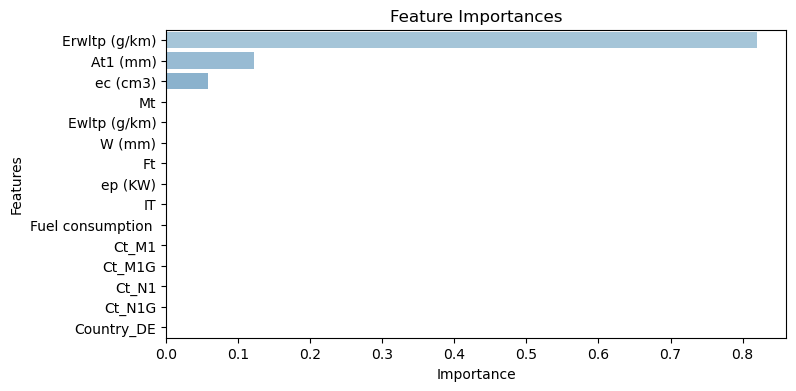

In [18]:
importances_sorted = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=importances_sorted['Importance'], y=importances_sorted.index, palette='Blues_d')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [ ]:
#Gridsearch_Decision tree classifier

In [18]:
param_gridDTC = {
    'criterion' : ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
}
grid_DTC = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_gridDTC, n_jobs=-1,
                        cv=2, verbose=1,refit= True)
grille = grid_DTC.fit(X_train_scaled,y_train)
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']])

print('le meilleur paramètre de DecisionTreeClassifier est :',grid_DTC.best_params_)

Fitting 2 folds for each of 64 candidates, totalling 128 fits
                                               params  mean_test_score
0   {'criterion': 'gini', 'max_depth': None, 'min_...         0.994956
1   {'criterion': 'gini', 'max_depth': None, 'min_...         0.994875
2   {'criterion': 'gini', 'max_depth': None, 'min_...         0.994849
3   {'criterion': 'gini', 'max_depth': None, 'min_...         0.994620
4   {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.600389
..                                                ...              ...
59  {'criterion': 'entropy', 'max_depth': 15, 'min...         0.992055
60  {'criterion': 'entropy', 'max_depth': 20, 'min...         0.994598
61  {'criterion': 'entropy', 'max_depth': 20, 'min...         0.994554
62  {'criterion': 'entropy', 'max_depth': 20, 'min...         0.994508
63  {'criterion': 'entropy', 'max_depth': 20, 'min...         0.994290

[64 rows x 2 columns]
le meilleur paramètre de DecisionTreeClassifier est : {'criteri

In [ ]:
13 minutes

In [ ]:
#Decision tree classifier avec les meilleurs paramètres 

In [19]:
dt_clf_gs = DecisionTreeClassifier(criterion='entropy', max_depth=4,random_state=123)
dt_clf_gs.fit(X_train_scaled,y_train)
y_test_pred_gs = dt_clf.predict(X_test_scaled)
y_train_pred_gs = dt_clf.predict(X_train_scaled)

#Matrice de confusion
print("Confusion Matrix train")
print(pd.crosstab(y_train, y_train_pred_gs, rownames=['reel'], colnames=['Predicted']))
print("\n")
print("Confusion Matrix test")
print(pd.crosstab(y_test, y_test_pred_gs, rownames=['reel'], colnames=['Predicted']))

Confusion Matrix train
Predicted       1       2       3       4       5      6
reel                                                    
1          373207   41000    5786      27      12      4
2               0  423522   43488     146   38289      0
3               0   30189  842285   27259   10747      1
4               0      54     845  445104    3324      3
5               0       0    1256    2741  231057     42
6               0       0    1885     240   45289  47488
7               0       0    1165      71      11  29901


Confusion Matrix test
Predicted       1       2       3       4      5      6
reel                                                   
1          124108   13873    1931       7      1      0
2               0  141966   14629      31  12586      0
3               0    9939  280896    9155   3605      0
4               0      20     277  148158   1130      0
5               0       0     460     961  76527     11
6               0       0     630     101  14887

In [20]:
#accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_gs)
test_accuracy = accuracy_score(y_test, y_test_pred_gs)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("\n")

#precision_score
train_precision = precision_score(y_train, y_train_pred_gs, average='weighted')
test_precision = precision_score(y_test, y_test_pred_gs, average='weighted')
print(f"Train precision: {train_precision * 100:.2f}%")
print(f"Test precision: {test_precision * 100:.2f}%")
print("\n")

#recall_score
train_recall = recall_score(y_train, y_train_pred_gs, average='weighted')
test_recall = recall_score(y_test, y_test_pred_gs, average='weighted')
print(f"Train recall: {train_recall * 100:.2f}%")
print(f"Test recall: {test_recall * 100:.2f}%")
print("\n")

#f1_score
train_f1 = f1_score(y_train, y_train_pred_gs, average='weighted')
test_f1 = f1_score(y_test, y_test_pred_gs, average='weighted')
print(f"Train f1: {train_f1 * 100:.2f}%")
print(f"Test f1: {test_f1 * 100:.2f}%")
print("\n")

#classification_report
class_report_train = classification_report(y_train, y_train_pred_gs)
class_report_test = classification_report(y_test, y_test_pred_gs)
print("Classification Report Train:", class_report_train)
print("Classification Report Test:", class_report_test)

Train Accuracy: 89.28%
Test Accuracy: 89.27%




C:\Users\lydia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lydia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train precision: 88.87%
Test precision: 88.85%


Train recall: 89.28%
Test recall: 89.27%


Train f1: 88.78%
Test f1: 88.77%




C:\Users\lydia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lydia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lydia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lydia\anaconda3\Lib\site-packages\sklearn\metr

Classification Report Train:               precision    recall  f1-score   support

           1       1.00      0.89      0.94    420036
           2       0.86      0.84      0.85    505445
           3       0.94      0.93      0.93    910481
           4       0.94      0.99      0.96    449330
           5       0.70      0.98      0.82    235096
           6       0.61      0.50      0.55     94902
           7       0.00      0.00      0.00     31148

    accuracy                           0.89   2646438
   macro avg       0.72      0.73      0.72   2646438
weighted avg       0.89      0.89      0.89   2646438

Classification Report Test:               precision    recall  f1-score   support

           1       1.00      0.89      0.94    139920
           2       0.86      0.84      0.85    169212
           3       0.94      0.93      0.93    303595
           4       0.94      0.99      0.96    149585
           5       0.70      0.98      0.82     77959
           6       0.

C:\Users\lydia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf_gs, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Accuracy moyenne en validation croisée: {scores.mean():.4f}')

Accuracy moyenne en validation croisée: 0.8928


In [ ]:
#Les résultats obtenus avec le Gridsearch sont similaires, il vaudrait mieux utiliser un autre modèle de machine learning 
#pour obtenir de meilleurs résultats

In [ ]:
#KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=7,p=2, metric="minkowski")
knn.fit(X_train_scaled,y_train)

y_test_pred_KNN = knn.predict(X_test_scaled)
y_train_pred_KNN = knn.predict(X_train_scaled)

KeyboardInterrupt: 

In [ ]:
#Matrice de confusion
print("Confusion Matrix train")
print(pd.crosstab(y_train, y_train_pred_KNN, rownames=['reel'], colnames=['Predicted']))
print("\n")
print("Confusion Matrix test")
print(pd.crosstab(y_test, y_test_pred_KNN, rownames=['reel'], colnames=['Predicted']))

In [ ]:
#Calcul des scores

In [24]:
#accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_KNN)
test_accuracy = accuracy_score(y_test, y_test_pred_KNN)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("\n")

#precision_score
train_precision = precision_score(y_train, y_train_pred_KNN, average='weighted')
test_precision = precision_score(y_test, y_test_pred_KNN, average='weighted')
print(f"Train precision: {train_precision * 100:.2f}%")
print(f"Test precision: {test_precision * 100:.2f}%")
print("\n")

#recall_score
train_recall = recall_score(y_train, y_train_pred_KNN, average='weighted')
test_recall = recall_score(y_test, y_test_pred_KNN, average='weighted')
print(f"Train recall: {train_recall * 100:.2f}%")
print(f"Test recall: {test_recall * 100:.2f}%")
print("\n")

#f1_score
train_f1 = f1_score(y_train, y_train_pred_KNN, average='weighted')
test_f1 = f1_score(y_test, y_test_pred_KNN, average='weighted')
print(f"Train f1: {train_f1 * 100:.2f}%")
print(f"Test f1: {test_f1 * 100:.2f}%")
print("\n")

#classification_report
class_report_train = classification_report(y_train, y_train_pred_KNN)
class_report_test = classification_report(y_test, y_test_pred_KNN)
print("Classification Report Train:", class_report_train)
print("Classification Report Test:", class_report_test)

NameError: name 'y_train_pred_KNN' is not defined

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Accuracy moyenne en validation croisée: {scores.mean():.4f}')

Accuracy moyenne en validation croisée: 0.8928


In [ ]:
#INTERPRETATION


In [ ]:
#Feature importance DecisionTree Classifier

In [ ]:
feats = {}
for feature, importance in zip(data_3.columns, gb.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False)

In [ ]:
#Visualisation des features importance

In [ ]:
importances_sorted = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=importances_sorted['Importance'], y=importances_sorted.index, palette='Blues_d')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [ ]:
#Gridsearch_KNeighborsClassifier

In [ ]:
#INTERPRETATION

In [ ]:
Le GradientBoostingClassifier s'utilise seul, car il est un algorithme de classification complet. Cependant, il repose sur des modèles faibles, 
qui sont généralement des arbres de décision peu profonds, qu'il combine pour créer un classificateur plus robuste.
Cependant, grâce au mécanisme de boosting, ces arbres sont entraînés successivement pour corriger les erreurs des précédents. 
Ainsi, même si chaque modèle faible est imparfait, leur combinaison produit un modèle fort.

In [ ]:
#GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train_scaled,y_train)

y_test_pred_gb = gb.predict(X_test_scaled)
y_train_pred_gb = gb.predict(X_train_scaled)

In [ ]:
#Matrice de confusion
print("Confusion Matrix train")
print(pd.crosstab(y_train, y_train_pred_gb, rownames=['reel'], colnames=['Predicted']))
print("\n")
print("Confusion Matrix test")
print(pd.crosstab(y_test, y_test_pred_gb, rownames=['reel'], colnames=['Predicted']))

In [ ]:
#Calcul des scores

In [ ]:
#accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_gb)
test_accuracy = accuracy_score(y_test, y_test_pred_gb)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("\n")

#precision_score
train_precision = precision_score(y_train, y_train_pred_gb, average='weighted')
test_precision = precision_score(y_test, y_test_pred_gb, average='weighted')
print(f"Train precision: {train_precision * 100:.2f}%")
print(f"Test precision: {test_precision * 100:.2f}%")
print("\n")

#recall_score
train_recall = recall_score(y_train, y_train_pred_gb, average='weighted')
test_recall = recall_score(y_test, y_test_pred_gb, average='weighted')
print(f"Train recall: {train_recall * 100:.2f}%")
print(f"Test recall: {test_recall * 100:.2f}%")
print("\n")

#f1_score
train_f1 = f1_score(y_train, y_train_pred_gb, average='weighted')
test_f1 = f1_score(y_test, y_test_pred_gb, average='weighted')
print(f"Train f1: {train_f1 * 100:.2f}%")
print(f"Test f1: {test_f1 * 100:.2f}%")
print("\n")

#classification_report
class_report_train = classification_report(y_train, y_train_pred_gb)
class_report_test = classification_report(y_test, y_test_pred_gb)
print("Classification Report Train:", class_report_train)
print("Classification Report Test:", class_report_test)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gb, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Accuracy moyenne en validation croisée: {scores.mean():.4f}')

In [ ]:
#INTERPRETATION

In [ ]:
Features importance Gradient Boosting

In [ ]:
feats = {}
for feature, importance in zip(data_3.columns, gb.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False)

In [ ]:
#Visualisation des features importance

In [ ]:
importances_sorted = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=importances_sorted['Importance'], y=importances_sorted.index, palette='Blues_d')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [ ]:
#Gridsearch Gradient Bossting

In [ ]:
Pour la classification, tracer les courbes ROC ou les distributions des probabilités prédites.
    
Métriques similaires sur train et test = bon modèle.
Performance supérieure sur train mais mauvaise sur test = overfitting.
Mauvaises performances sur les deux = underfitting.
Utilisez des outils comme les courbes d'apprentissage et la validation croisée pour obtenir une vision plus détaillée de la performance.

Accuracy : Cela donne une première idée de la performance. Si la précision est trop haute sur l'entraînement et basse sur le test, cela indique un surapprentissage.
Classification report : Donne des détails sur les métriques comme la précision (precision), le rappel (recall) et le F1-score pour chaque classe de la variable cible.
Matrice de confusion : Montre visuellement les erreurs de classification, c'est-à-dire où le modèle fait des erreurs pour prédire les catégories des émissions de CO2.